# Reto -> Entrega 1 Limpieza, análisis, visualización y kmeans
# Alumno: Luis José Navarrete Baduy, Rodrigo López Aguilera
# Matrícula: A01793919, A01793071
# Profesor: Maria de la Paz Rico
# Fecha: 16 de noviembre del 2022

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
df = pd.read_csv('../data/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', encoding='ISO-8859-1')
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


## Limpiando el dataset

In [101]:
columnas_remover = ['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO', 'ACUIFERO', 
'SUBTIPO', 'PERIODO', 'SDT_mg/L', 'CD_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L',
'COLI_FEC_NMP/100_mL', 'AS_TOT_mg/L', 'CR_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L'
]
df.drop(columnas_remover, axis=1, inplace=True)
# ALC_mg/L	CONDUCT_mS/cm	SDT_M_mg/L	DUR_mg/L	N_NO3_mg/L

In [102]:
df.head()

,LONGITUD,LATITUD,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,-102.02210,22.20887,229.990,Alta,940.0,Permisible para riego,603.6,Cultivos sensibles,Potable - Dulce,0.9766,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,-102.20075,21.99958,231.990,Alta,608.0,Buena para riego,445.4,Excelente para riego,Potable - Dulce,0.9298,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,-102.28801,22.36685,204.920,Alta,532.0,Buena para riego,342,Excelente para riego,Potable - Dulce,1.8045,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,-102.29449,22.18435,327.000,Alta,686.0,Buena para riego,478.6,Excelente para riego,Potable - Dulce,1.1229,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,-110.24480,23.45138,309.885,Alta,1841.0,Permisible para riego,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [103]:
# REPLACE VALUES FOR THESE COLUMNS
df = df[df['SDT_M_mg/L'] != '<25']
df = df[df['DUR_mg/L'] != '<20']
df['N_NO3_mg/L'].replace('<0.02', 0, inplace=True)
df['FLUORUROS_mg/L'].replace('<0.2', 0, inplace=True)
df.dropna(inplace=True)

df = df.astype({'SDT_M_mg/L':'float32', 'N_NO3_mg/L':'float32', 'DUR_mg/L':'float32', 'FLUORUROS_mg/L': 'float32'})

In [104]:
numerics = ['int64', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = df.select_dtypes(include=numerics)
df_numeric.head()

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,N_NO3_mg/L
2,-102.288010,22.366850,204.920,532.0,342.000000,1.8045,120.719002,1.449803
4,-110.244800,23.451380,309.885,1841.0,1179.000000,0.2343,476.987213,15.672251
5,-110.220670,23.464930,224.475,570.3,554.799988,0.2756,201.878403,8.555740
7,-109.907306,22.890500,350.760,2253.3,1160.199951,0.5607,269.171204,27.600998
9,-110.054722,23.824722,332.605,1703.0,1017.799988,0.5088,559.021423,0.143061


In [105]:
df_numeric.isna().sum()

LONGITUD          0
LATITUD           0
ALC_mg/L          0
CONDUCT_mS/cm     0
SDT_M_mg/L        0
FLUORUROS_mg/L    0
DUR_mg/L          0
N_NO3_mg/L        0
dtype: int64

In [106]:
df_numeric.describe()

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,N_NO3_mg/L
count,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000
mean,-101.737853,23.332116,255.888642,1483.175662,1221.766357,1.221470,457.739136,5.586478
std,6.831866,3.733554,122.799179,1533.756739,3615.350830,1.587721,434.088531,10.651263
min,-116.664250,15.064110,26.640000,188.000000,139.399994,0.000000,21.940599,0.000000
25%,-104.916900,20.472502,182.730000,608.750000,432.400002,0.311025,149.107502,0.706121
50%,-102.268905,23.006460,231.077500,1132.000000,778.000000,0.635900,342.700806,2.645978
75%,-99.008530,25.521922,315.002500,1790.750000,1288.000000,1.659050,613.043503,5.879826
max,-86.868880,32.677713,1650.000000,18577.000000,82170.000000,15.424300,3810.692139,121.007812


In [107]:
target = ['SEMAFORO']
features = [v for v in df.columns.values.tolist() if v not in target]
target_df = df[target]
features_df = df[features]

In [108]:
not_numeric_cols = [key for key in dict(features_df.dtypes) if dict(features_df.dtypes)[key] not in numerics]
new_numeric_df = pd.get_dummies(features_df, prefix=not_numeric_cols)

In [109]:
final_df = new_numeric_df.copy()
final_df['SEMAFORO'] = target_df
final_df.to_csv('../data/data_subterraneos_clean.csv', encoding='ISO-8859-1', index=False)

In [110]:
final_df.dtypes

LONGITUD            float64
LATITUD             float64
ALC_mg/L            float64
CONDUCT_mS/cm       float64
SDT_M_mg/L          float32
                     ...   
CUMPLE_CON_MN_NO      uint8
CUMPLE_CON_MN_SI      uint8
CUMPLE_CON_FE_NO      uint8
CUMPLE_CON_FE_SI      uint8
SEMAFORO             object
Length: 212, dtype: object

<AxesSubplot:xlabel='ALC_mg/L'>

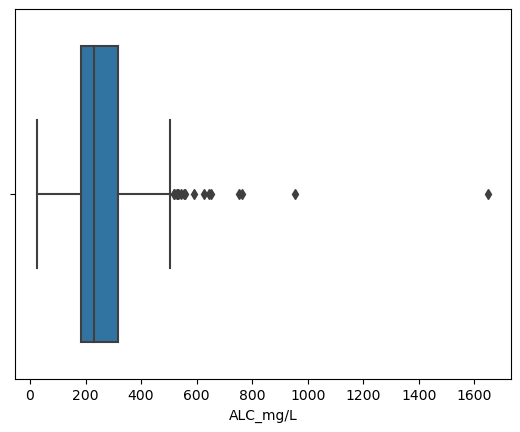

In [111]:
sns.boxplot(x=final_df['ALC_mg/L'])

In [112]:
quantile_ALC_3 = final_df['ALC_mg/L'].quantile(0.75)
outliers = (final_df['ALC_mg/L'] > quantile_ALC_3).sum()
print(f'Number of outliers {outliers}')

Number of outliers 151


<AxesSubplot:xlabel='CONDUCT_mS/cm'>

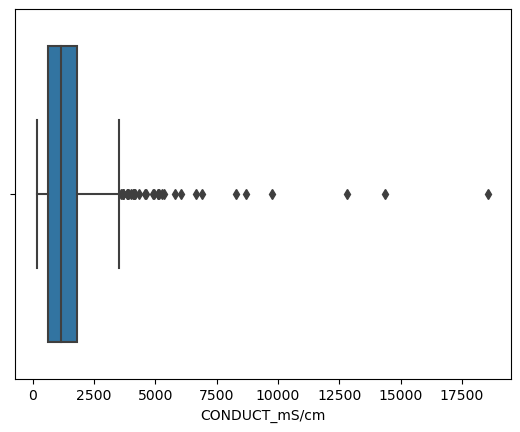

In [113]:
sns.boxplot(x=final_df['CONDUCT_mS/cm'])

In [114]:
quantile_CONDUCT_3 = final_df['CONDUCT_mS/cm'].quantile(0.75)
outliers = (final_df['CONDUCT_mS/cm'] > quantile_CONDUCT_3).sum()
print(f'Number of outliers {outliers}')

Number of outliers 151


<AxesSubplot:xlabel='SDT_M_mg/L'>

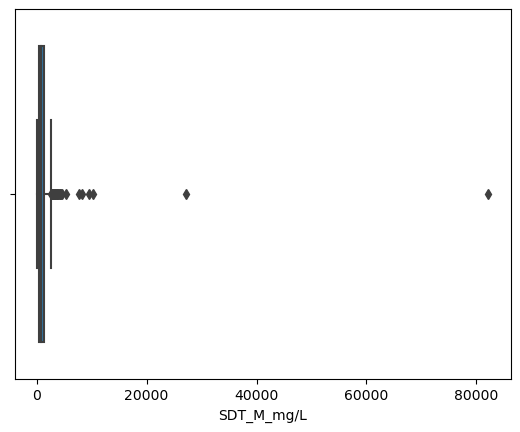

In [115]:
sns.boxplot(x=final_df['SDT_M_mg/L'])

In [116]:
quantile_SDT_M_mg_3 = final_df['SDT_M_mg/L'].quantile(0.75)
outliers = (final_df['SDT_M_mg/L'] > quantile_SDT_M_mg_3).sum()
print(f'Number of outliers {outliers}')

Number of outliers 150


<AxesSubplot:xlabel='DUR_mg/L'>

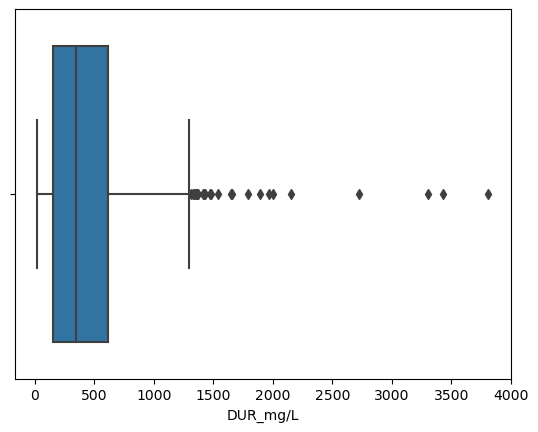

In [117]:
sns.boxplot(x=final_df['DUR_mg/L'])

In [118]:
quantile_DUR_mg_3 = final_df['DUR_mg/L'].quantile(0.75)
outliers = (final_df['DUR_mg/L'] > quantile_DUR_mg_3).sum()
print(f'Number of outliers {outliers}')

Number of outliers 151


<AxesSubplot:xlabel='N_NO3_mg/L'>

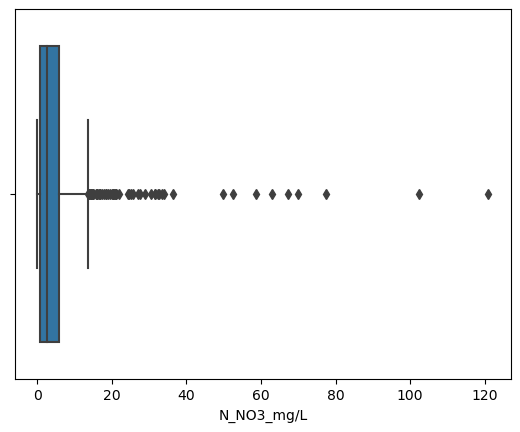

In [119]:
sns.boxplot(x=final_df['N_NO3_mg/L'])

In [123]:
quantile_N_NO3_mg_3 = final_df['N_NO3_mg/L'].quantile(0.75)
outliers = (final_df['N_NO3_mg/L'] > quantile_N_NO3_mg_3).sum()
print(f'Number of outliers {outliers}')

Number of outliers 151


<AxesSubplot:>

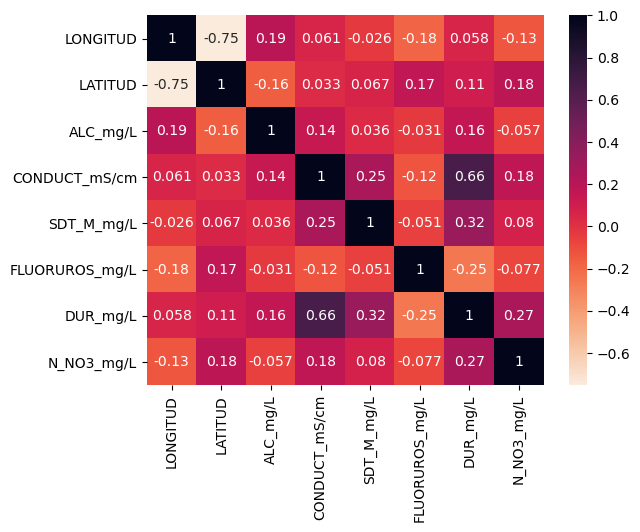

In [122]:
sns.heatmap(df_numeric.corr(), annot=True, cmap='rocket_r')

## Usando kmeans para determinar el numero de agrupamientos

In [127]:
latlong=final_df[["LATITUD","LONGITUD"]]

<AxesSubplot:xlabel='LATITUD', ylabel='LONGITUD'>

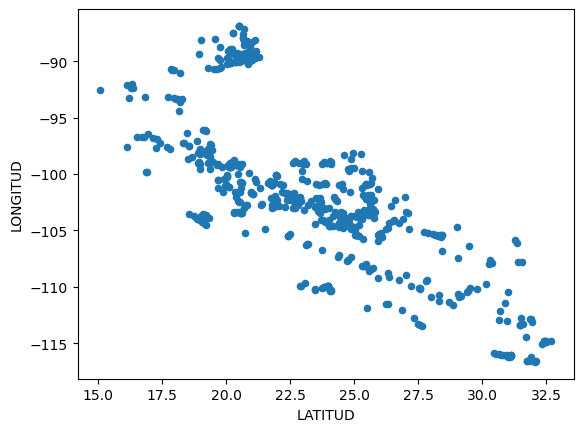

In [128]:
latlong.plot.scatter( "LATITUD","LONGITUD")

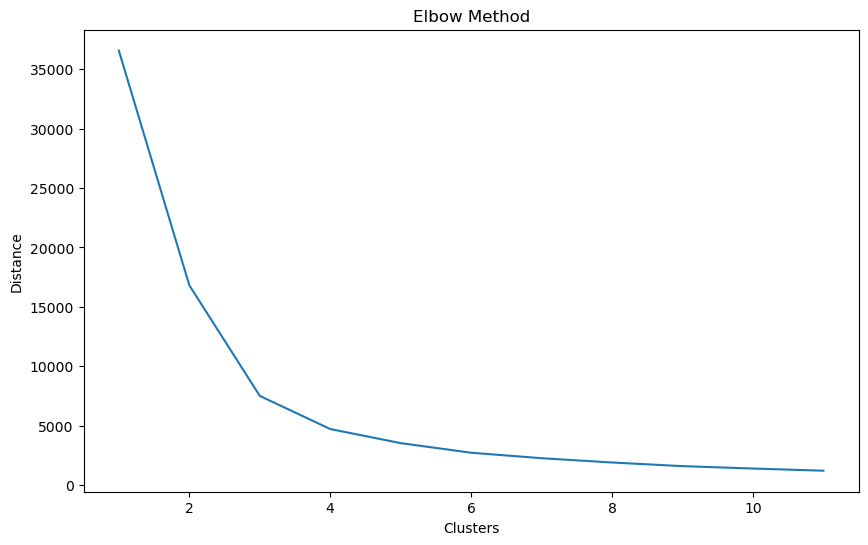

In [133]:
from sklearn.cluster import KMeans
import geopandas as gpd
from shapely.geometry import Point
K = range(1,12)
distance=[]

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1, n_init=20).fit(latlong)
    distance.append(kmeans.inertia_) 

plt.figure(figsize=(10, 6))
plt.plot(K, distance)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Distance')
plt.show()

# NÚMERO OPTIMO ES 3 CLUSTERS

In [130]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmean_p = kmeans.fit_predict(latlong) # Nos dice a que cluster pertenece cada ubicacion
countTotal = np.bincount(kmean_p)
print(countTotal)
print(kmeans.cluster_centers_) # Latitud y longitud de los lugares optimos

[108 127 369]
[[  19.72207237  -90.44847336]
 [  28.33881983 -110.8363076 ]
 [  22.66553988 -101.91061549]]


In [42]:
map_colors = {0: 'red', 1: 'cyan', 2: 'green'}
kmeans_pred_colors = [map_colors[v] for v in kmean_p]

In [131]:
# Obtener las ciudades de cada almacen
from geopy.geocoders import Nominatim
centers = kmeans.cluster_centers_
geolocator = Nominatim(user_agent="kmeans_app")
locations = []
for i in range(len(centers)):
  location = geolocator.reverse(str(centers[i][0]) + "," + str(centers[i][1]))
  locations.append(location.address)
  print(f'Location {i+1}: {location.address}')

Location 1: Mucuychakán, Municipio de Campeche, Campeche, México
Location 2: Las Cuatas, Guaymas, Sonora, México
Location 3: Viborillas, Salinas, San Luis Potosí, México


In [134]:
sitios = pd.DataFrame()
sitios['LocationName'] = locations
sitios[['Latitude', 'Longitude']] = centers
sitios["Coordinates"] = list(zip(sitios.Longitude, sitios.Latitude))
sitios["Coordinates"] = sitios["Coordinates"].apply(Point)

In [135]:
final_df["Coordinates"] = list(zip(final_df.LONGITUD, final_df.LATITUD))
final_df["Coordinates"] = final_df["Coordinates"].apply(Point)
final_df.head()

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,N_NO3_mg/L,CALIDAD_ALC_Alta,CALIDAD_ALC_Baja,...,CUMPLE_CON_HG_NO,CUMPLE_CON_HG_SI,CUMPLE_CON_PB_NO,CUMPLE_CON_PB_SI,CUMPLE_CON_MN_NO,CUMPLE_CON_MN_SI,CUMPLE_CON_FE_NO,CUMPLE_CON_FE_SI,SEMAFORO,Coordinates
2,-102.288010,22.366850,204.920,532.0,342.000000,1.8045,120.719002,1.449803,1,0,...,0,1,0,1,0,1,0,1,Rojo,POINT (-102.28801 22.36685)
4,-110.244800,23.451380,309.885,1841.0,1179.000000,0.2343,476.987213,15.672251,1,0,...,0,1,0,1,0,1,0,1,Rojo,POINT (-110.2448 23.45138)
5,-110.220670,23.464930,224.475,570.3,554.799988,0.2756,201.878403,8.555740,1,0,...,0,1,0,1,0,1,0,1,Rojo,POINT (-110.22067 23.46493)
7,-109.907306,22.890500,350.760,2253.3,1160.199951,0.5607,269.171204,27.600998,1,0,...,0,1,0,1,0,1,0,1,Rojo,POINT (-109.907306 22.8905)
9,-110.054722,23.824722,332.605,1703.0,1017.799988,0.5088,559.021423,0.143061,1,0,...,0,1,0,1,1,0,1,0,Rojo,POINT (-110.054722 23.824722)


In [137]:
gdf = gpd.GeoDataFrame(final_df, geometry="Coordinates")
gdf.head()

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,N_NO3_mg/L,CALIDAD_ALC_Alta,CALIDAD_ALC_Baja,...,CUMPLE_CON_HG_NO,CUMPLE_CON_HG_SI,CUMPLE_CON_PB_NO,CUMPLE_CON_PB_SI,CUMPLE_CON_MN_NO,CUMPLE_CON_MN_SI,CUMPLE_CON_FE_NO,CUMPLE_CON_FE_SI,SEMAFORO,Coordinates
2,-102.288010,22.366850,204.920,532.0,342.000000,1.8045,120.719002,1.449803,1,0,...,0,1,0,1,0,1,0,1,Rojo,POINT (-102.28801 22.36685)
4,-110.244800,23.451380,309.885,1841.0,1179.000000,0.2343,476.987213,15.672251,1,0,...,0,1,0,1,0,1,0,1,Rojo,POINT (-110.24480 23.45138)
5,-110.220670,23.464930,224.475,570.3,554.799988,0.2756,201.878403,8.555740,1,0,...,0,1,0,1,0,1,0,1,Rojo,POINT (-110.22067 23.46493)
7,-109.907306,22.890500,350.760,2253.3,1160.199951,0.5607,269.171204,27.600998,1,0,...,0,1,0,1,0,1,0,1,Rojo,POINT (-109.90731 22.89050)
9,-110.054722,23.824722,332.605,1703.0,1017.799988,0.5088,559.021423,0.143061,1,0,...,0,1,0,1,1,0,1,0,Rojo,POINT (-110.05472 23.82472)


In [138]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,889953.0,Oceania,Fiji,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,58005463.0,Africa,Tanzania,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253.0,Africa,W. Sahara,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,37589262.0,North America,Canada,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,328239523.0,North America,United States of America,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [139]:
sitios_gpd = gpd.GeoDataFrame(sitios, geometry="Coordinates")
sitios_gpd.head()

,LocationName,Latitude,Longitude,Coordinates
0,"Mucuychakán, Municipio de Campeche, Campeche, ...",19.722072,-90.448473,POINT (-90.44847 19.72207)
1,"Las Cuatas, Guaymas, Sonora, México",28.338820,-110.836308,POINT (-110.83631 28.33882)
2,"Viborillas, Salinas, San Luis Potosí, México",22.665540,-101.910615,POINT (-101.91062 22.66554)


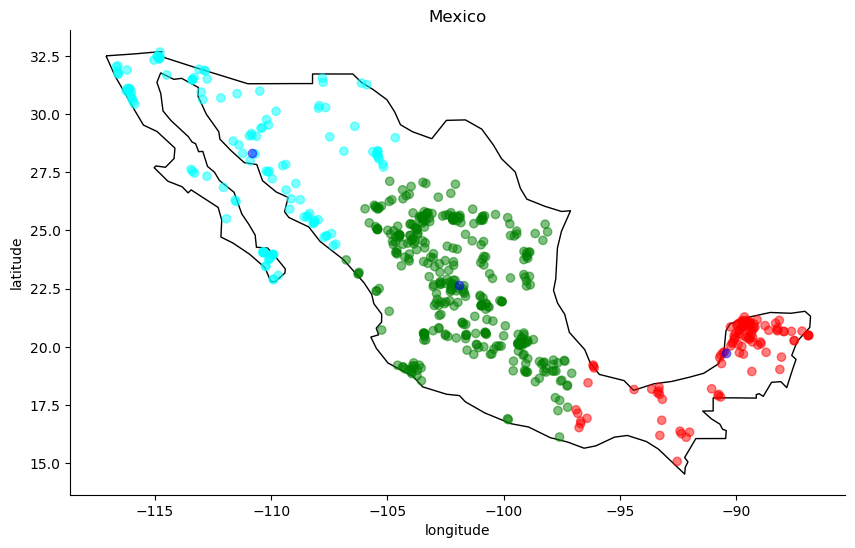

In [43]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color=kmeans_pred_colors, alpha = 0.5)
sitios_gpd.plot(ax=gax, color='blue', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()